In [1]:
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Read in the review data
df = pd.read_excel("shawAcademyReviewOnTrustPilot.xlsx")
df.head()

,reviewer,reviewTitle,reviewBody,rating
0,Johnathan Vassar,Dishonest advertisement\n \n\n\...,They advertise live online classes with real i...,1
1,II- Saracndd -II,DISGUSTING SCAMMERS AND LIARS\n ...,"PLEASE, DO YOURSELF A HUGE FAVOUR AND DO NOT I...",1
2,H C,TOALLY A SCAM BUT THEY HAVE SCAMMED THE WRONG ...,YOU SCAMMED THE WRONG PERSON - I'LL ESTABLISH ...,1
3,Angry and Scorned,"Another day, another HONEST review about this ...",Negative stars aren’t allowed but that’s what ...,1
4,Mat,Don’t ever use this service\n \...,I can’t stress how much I would advise people ...,1


In [3]:
# We only need average and bad review. So let's filter review by rating 1,2 and 3
rating123 = df.loc[df.rating.isin([1,2,3]), :]

# Clean review title
rating123.loc[:, "reviewTitle"] = rating123.reviewTitle.str.split("\n").str[0].str.strip()

# Lower case review title and review body
rating123.reviewBody = rating123.reviewBody.str.lower().str.strip()
rating123.reviewTitle = rating123.reviewTitle.str.lower().str.strip()

# Let's count the rating frequency
rating123.loc[:, "rating"].value_counts().reset_index().rename(columns={"index":"rating", "rating":"frequency"})

,rating,frequency
0,1,1077
1,3,81
2,2,37


In [4]:
# Remove stopwords from review title and body
nltk.download("stopwords")
stopWord = stopwords.words("english")

rating123["noStopWorReviewTitle"] = rating123.reviewTitle.apply(lambda x:" ".join([word for word in x.split() if word not in (stopWord)]))
rating123["noStopWorReviewBody"] = rating123.reviewBody.apply(lambda x:" ".join([word for word in x.split() if word not in (stopWord)]))

[nltk_data] Downloading package stopwords to /home/faysal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def generateGrams(series):
    uniGram = series.str.lower().str.replace(r"[^a-z\s]", "").str.split(expand=True).stack()
    biGram = uniGram + " " + uniGram.shift(-1)
    # triGram = biGram + " " + uniGram.shift(-2)
    
    # Calculate frequency
    uniGramFreq = uniGram.dropna().value_counts().reset_index().rename(columns={"index":"word", 0:"frequency"})
    biGramFreq = biGram.dropna().value_counts().reset_index().rename(columns={"index":"word", 0:"frequency"})
    return uniGramFreq, biGramFreq

In [6]:
# Create unigram and bigram for review title and body
titleUniGram, titleBiGram = generateGrams(rating123.noStopWorReviewTitle)
bodyUniGram, bodyBiGram = generateGrams(rating123.noStopWorReviewBody)

In [7]:
def generateGramFreqPlot(df, title):
    # Plot top 15 frequency
    fig, ax = plt.subplots(1,1, figsize=(20,10))
    df.set_index("word").iloc[:15].plot.bar(figsize=(20,10), ax=ax)
    ax.set_title(f"Top 15 Frequency for {title}", fontsize=18)
    ax.set_xlabel("word", fontsize=16)
    ax.set_ylabel("Frequency", fontsize=16)
    ax.tick_params(axis="both", labelsize=15)

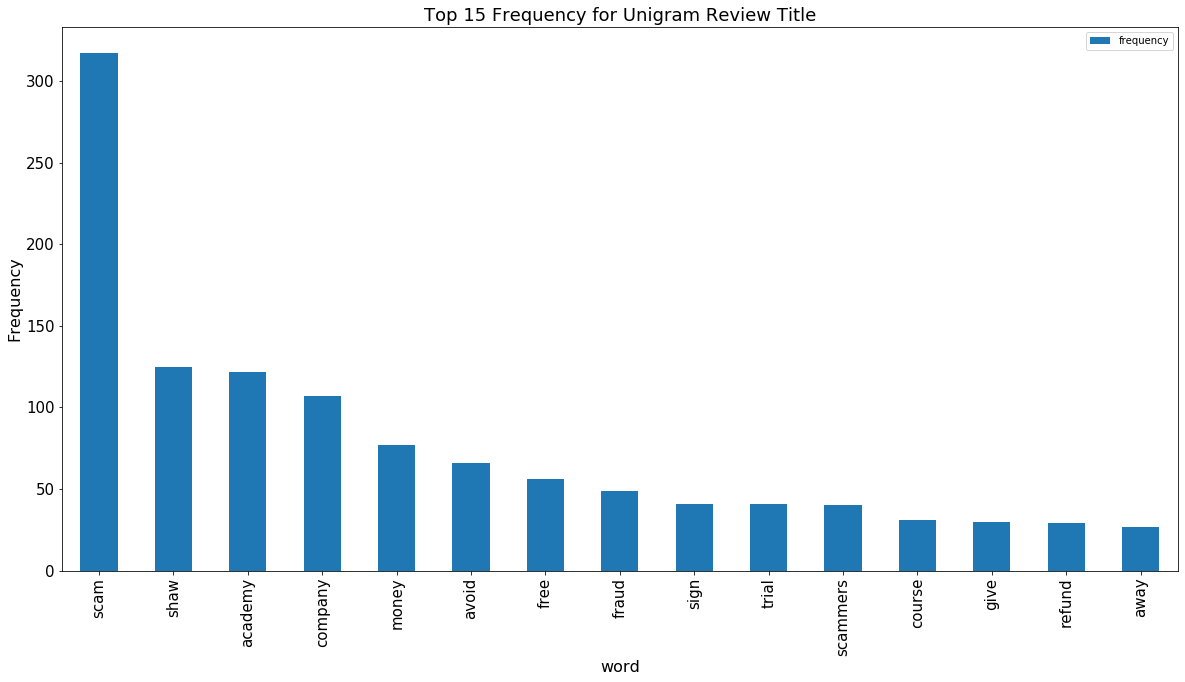

In [8]:
# Plot unigram frequency for review title
generateGramFreqPlot(titleUniGram, "Unigram Review Title")

### Spoiler: "scam" is the most frequent word for review title

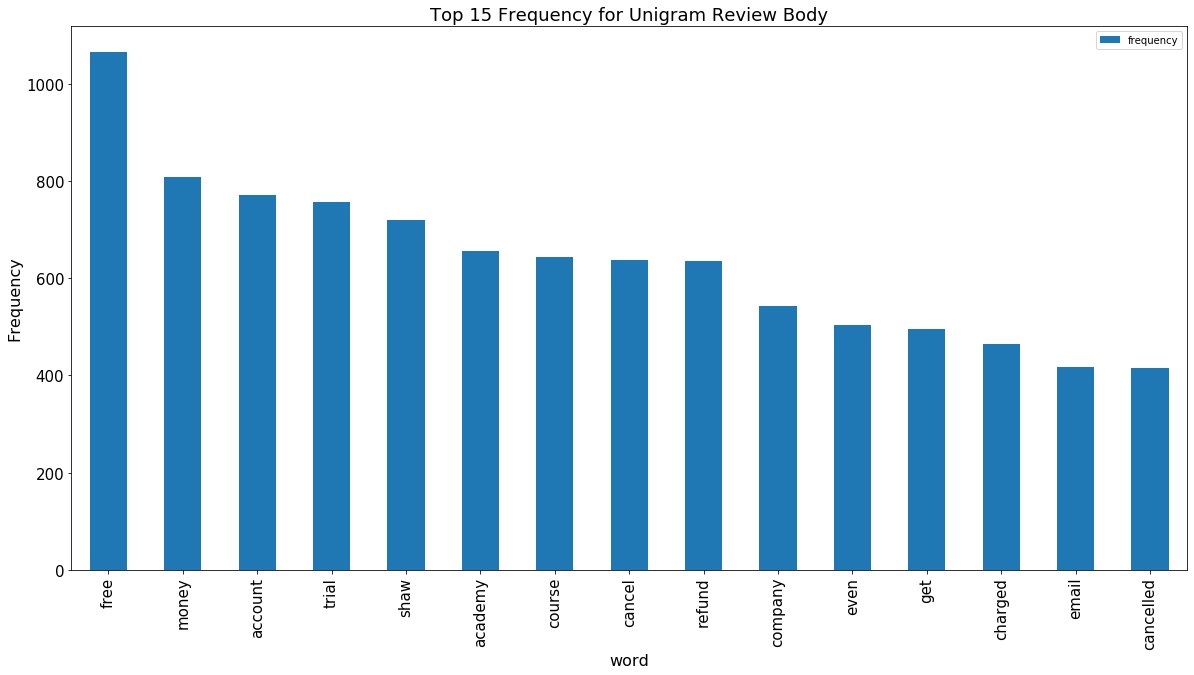

In [9]:
# Plot unigram frequency for review body
generateGramFreqPlot(bodyUniGram, "Unigram Review Body")